In [2]:
import h5py
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import heapq

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("ticks")

In [3]:
froot ="/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/*"
flists = np.sort(glob.glob(froot))
XMIN = 3000
XMAX = 9000

## open the file and get 1 minute recording from channel 3000 - 9000

In [37]:
fname = flists[-1049]
fp = h5py.File(fname, 'r')
rawData = fp['Acquisition']['Raw[0]']['RawData'][XMIN:XMAX, :].astype(float)
print(fname)
fp.close()

/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-04T000314Z.h5


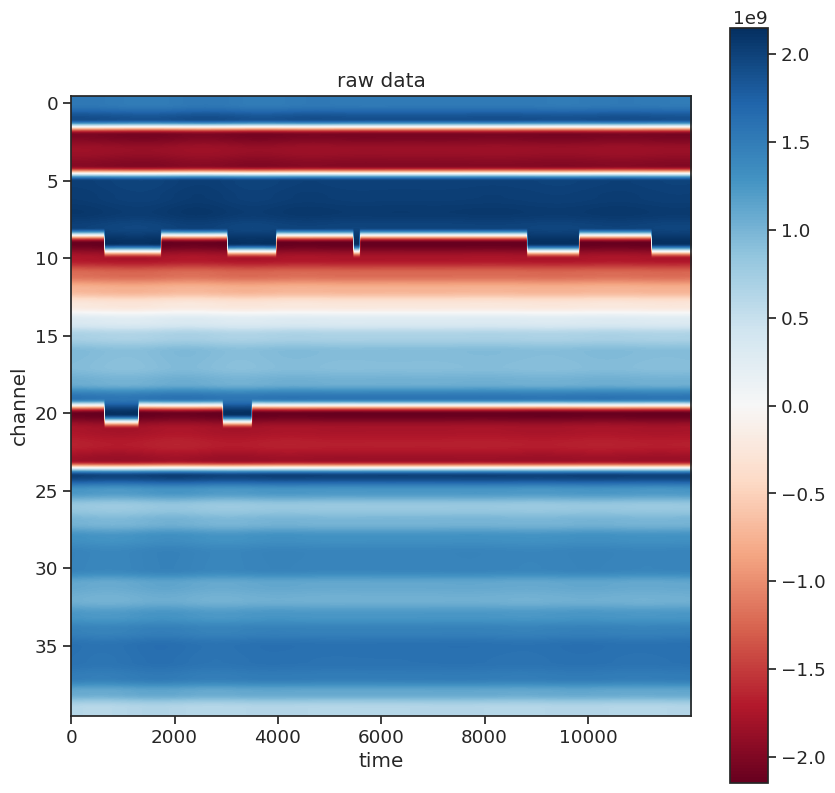

In [45]:
plt.figure(figsize = (10, 10), dpi = 100)
plt.imshow(rawData[:40, :], cmap = 'RdBu', aspect = 300)
plt.xlabel("time")
plt.ylabel("channel")
plt.title("raw data")
plt.colorbar()

Text(0.5, 0, 'time')

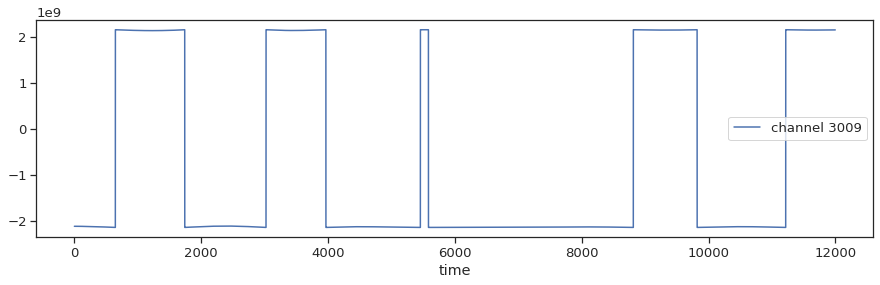

In [72]:
plt.figure(figsize = (15, 4))
plt.plot(rawData[9, :], label = f'channel 3009')
plt.legend()
plt.xlabel("time")

## shifting the negative part by +4.295e9, the data looks "continuous" again

Text(0.5, 0, 'time')

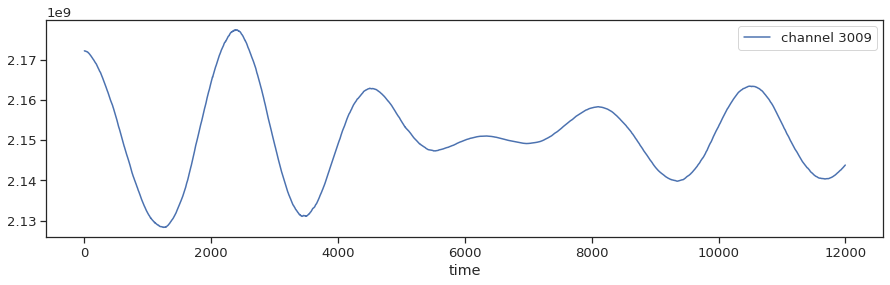

In [75]:
shift = rawData[9, :] + (rawData[9, :]<0)*np.ones(12000)*4.295e9
plt.figure(figsize = (15, 4))
plt.plot(shift, label = f'channel 3009')
plt.legend()
plt.xlabel("time")